<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**pip install graphviz pydotplus**

In [10]:
!pip install graphviz pydotplus


Step 1: Create the dataset

In [7]:
#import numpy as np
#import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
#import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
import graphviz

# Ensure reproducibility
np.random.seed(42)
# Create a dataset with 10 students
data = {
    'Study_Hours': [10, 8, 7, 5, 4, 6, 7, 3, 9, 2],
    'Previous_Exam_Score': [85, 78, 65, 50, 45, 60, 70, 40, 80, 30],
    'Pass/Fail': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0]  # 1: Pass, 0: Fail
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features: Study_Hours and Previous_Exam_Score
X = df[['Study_Hours', 'Previous_Exam_Score']]

# Labels: Pass/Fail
y = df['Pass/Fail']



Dataset:
    Study_Hours  Previous_Exam_Score  Pass/Fail
0           10                   85          1
1            8                   78          1
2            7                   65          1
3            5                   50          1
4            4                   45          0
5            6                   60          1
6            7                   70          1
7            3                   40          0
8            9                   80          1
9            2                   30          0


Step 2: Fit a decision tree classifier


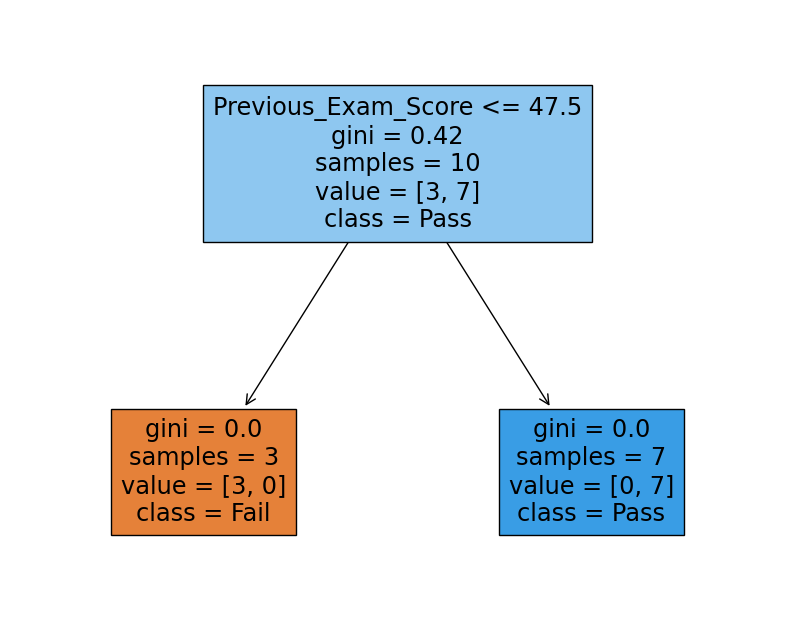

In [8]:
# Initialize the decision tree classifier
# it can be criterion='entropy'
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['Study_Hours', 'Previous_Exam_Score'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


Step 3: Predict the class for a new student

In [5]:
# Predict the class for a new student with 7 study hours and 65 previous exam score
new_student = np.array([[7, 65]])
prediction = clf.predict(new_student)
predicted_class = "Pass" if prediction == 1 else "Fail"

print(f"The predicted class for the new student is: {predicted_class}")


The predicted class for the new student is: Pass


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Step 4: Calculate and visualize the decision boundary


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


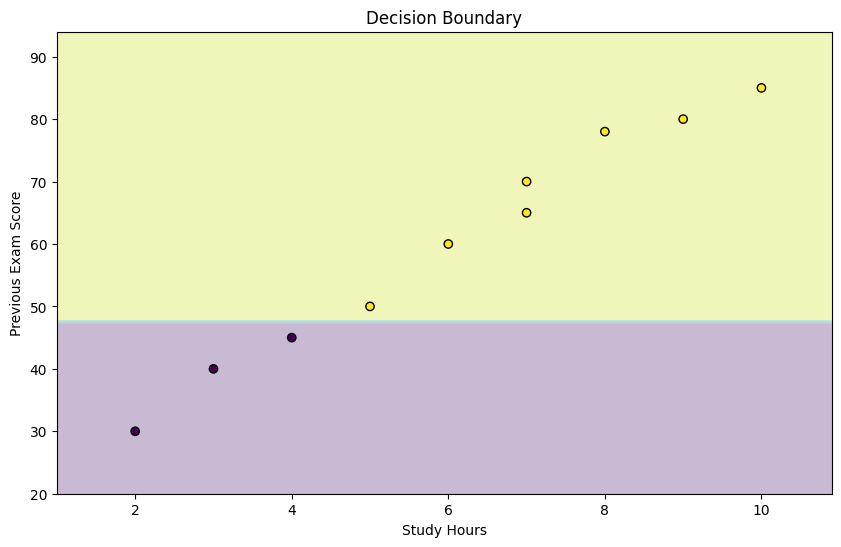

In [6]:
# Define the decision boundary
x_min, x_max = X['Study_Hours'].min() - 1, X['Study_Hours'].max() + 1
y_min, y_max = X['Previous_Exam_Score'].min() - 10, X['Previous_Exam_Score'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['Study_Hours'], X['Previous_Exam_Score'], c=y, edgecolors='k', marker='o')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.title('Decision Boundary')
plt.show()


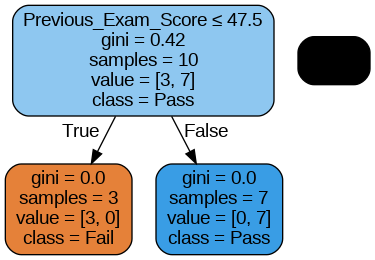

In [9]:
# Export the decision tree as a dot file
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=['Study_Hours', 'Previous_Exam_Score'],
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Use pydotplus to convert the dot file to an image
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the image in Jupyter Notebook
Image(graph.create_png())